In [38]:
import pandas as pd
import numpy as np

In [39]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [40]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [41]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [42]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
andhra pradesh            17112
assam                     17112
jharkhand                 16368
west bengal               14136
haryana                   14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
jammu and kashmir         10416
kerala                    10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
mizoram                    5952
nagaland                   5952
meghalaya                  5208
puducherry                 2976
sikkim                     2976
tripura                    2976
andaman and nicobar        1488
goa                        1488
daman and diu              1488
chandiga

In [43]:
a = []
for i in range(len(df)):
    if df['state'][i]!='bihar':
        a.append(i)

In [44]:
df = df.drop(a)

In [45]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
17856,1958,1,30,25.4,11.6,53,-0.8,bihar,gaya,5,4,4,3,16,9,28,17
17857,1958,2,4,27.2,14.2,42,-0.9,bihar,gaya,5,4,4,3,16,9,28,17
17858,1958,3,7,34.5,18.0,37,-1.1,bihar,gaya,5,4,4,3,16,9,28,17
17859,1958,4,6,39.8,25.1,21,-1.0,bihar,gaya,5,4,4,3,16,9,28,17
17860,1958,5,4,41.7,28.1,13,-1.5,bihar,gaya,5,4,4,3,16,9,28,17


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27528 entries, 17856 to 430031
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            27528 non-null  int64  
 1   Month           27528 non-null  int64  
 2   ppt(mm)         27528 non-null  int64  
 3   tmax(degC)      27528 non-null  float64
 4   tmin(degC)      27528 non-null  float64
 5   aet(mm)         27528 non-null  int64  
 6   PDSI(unitless)  27528 non-null  float64
 7   state           27528 non-null  object 
 8   district        27528 non-null  object 
 9   cluster14       27528 non-null  int64  
 10  cluster15       27528 non-null  int64  
 11  cluster18       27528 non-null  int64  
 12  cluster20       27528 non-null  int64  
 13  cluster25       27528 non-null  int64  
 14  cluster27       27528 non-null  int64  
 15  cluster30       27528 non-null  int64  
 16  cluster35       27528 non-null  int64  
dtypes: float64(3), int64(12), 

In [47]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(27528, 8)

In [48]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [49]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
17856,1958,1,30,25.4,11.6,53,-0.8,gaya,1-1958
17857,1958,2,4,27.2,14.2,42,-0.9,gaya,2-1958
17858,1958,3,7,34.5,18.0,37,-1.1,gaya,3-1958
17859,1958,4,6,39.8,25.1,21,-1.0,gaya,4-1958
17860,1958,5,4,41.7,28.1,13,-1.5,gaya,5-1958


In [50]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
17856,1958,1,30,25.4,11.6,53,-0.8,gaya,1958-01-01,1
17857,1958,2,4,27.2,14.2,42,-0.9,gaya,1958-02-01,1
17858,1958,3,7,34.5,18.0,37,-1.1,gaya,1958-03-01,1
17859,1958,4,6,39.8,25.1,21,-1.0,gaya,1958-04-01,1
17860,1958,5,4,41.7,28.1,13,-1.5,gaya,1958-05-01,1


In [52]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
17856,1958,1,30,53,-0.8,gaya,1958-01-01,1,18.50
17857,1958,2,4,42,-0.9,gaya,1958-02-01,1,20.70
17858,1958,3,7,37,-1.1,gaya,1958-03-01,1,26.25
17859,1958,4,6,21,-1.0,gaya,1958-04-01,1,32.45
17860,1958,5,4,13,-1.5,gaya,1958-05-01,1,34.90


In [53]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
430027,2019,8,250,138,-3.9,darbhanga,2019-08-01,1,30.60
430028,2019,9,351,104,-0.9,darbhanga,2019-09-01,1,28.60
430029,2019,10,21,71,-1.5,darbhanga,2019-10-01,1,27.15
430030,2019,11,3,45,-1.7,darbhanga,2019-11-01,1,23.35
430031,2019,12,7,30,-1.6,darbhanga,2019-12-01,1,15.60


In [54]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,29,16.25,42,gaya
1,1981-02-01,7,20.35,36,gaya
2,1981-03-01,19,24.85,40,gaya
3,1981-04-01,9,29.70,21,gaya
4,1981-05-01,22,32.25,29,gaya


In [55]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
18588,2019,1,16,33,-2.8,gaya,2019-01-01,1,16.10
18589,2019,2,12,35,-2.5,gaya,2019-02-01,1,20.00
18590,2019,3,9,32,-2.3,gaya,2019-03-01,1,24.45
18591,2019,4,5,17,-2.1,gaya,2019-04-01,1,30.95
18592,2019,5,4,12,-2.4,gaya,2019-05-01,1,35.05
...,...,...,...,...,...,...,...,...,...
430027,2019,8,250,138,-3.9,darbhanga,2019-08-01,1,30.60
430028,2019,9,351,104,-0.9,darbhanga,2019-09-01,1,28.60
430029,2019,10,21,71,-1.5,darbhanga,2019-10-01,1,27.15
430030,2019,11,3,45,-1.7,darbhanga,2019-11-01,1,23.35


In [56]:
from fbprophet import Prophet

In [57]:
model = Prophet()

In [58]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [60]:
p = conditions[['mid_temp','Year']]

In [61]:
p

,mid_temp,Year
17856,18.50,1958
17857,20.70,1958
17858,26.25,1958
17859,32.45,1958
17860,34.90,1958
...,...,...
430027,30.60,2019
430028,28.60,2019
430029,27.15,2019
430030,23.35,2019


In [62]:
k = []

In [63]:
p = p.loc[p['Year']==2019]

In [64]:
p = p.drop(k)

In [65]:
p

,mid_temp,Year
18588,16.10,2019
18589,20.00,2019
18590,24.45,2019
18591,30.95,2019
18592,35.05,2019
...,...,...
430027,30.60,2019
430028,28.60,2019
430029,27.15,2019
430030,23.35,2019


In [66]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
16867,2018-08-01,259,29.25,121,darbhanga
16868,2018-09-01,146,28.90,119,darbhanga
16869,2018-10-01,49,25.65,91,darbhanga
16870,2018-11-01,4,21.20,46,darbhanga
16871,2018-12-01,1,17.20,28,darbhanga


In [67]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [69]:
forecast = model.predict(fut)

In [70]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,25.481979,27.058502,29.907856,25.442189,25.540342,2.946081,2.946081,2.946081,2.946081,2.946081,2.946081,0.0,0.0,0.0,28.428060
465,2019-09-30,25.478645,25.339398,28.146259,25.426774,25.556497,1.233355,1.233355,1.233355,1.233355,1.233355,1.233355,0.0,0.0,0.0,26.712000
466,2019-10-31,25.475200,21.072966,23.808744,25.412974,25.565567,-3.082357,-3.082357,-3.082357,-3.082357,-3.082357,-3.082357,0.0,0.0,0.0,22.392843
467,2019-11-30,25.471866,16.371210,19.249312,25.396380,25.588297,-7.677352,-7.677352,-7.677352,-7.677352,-7.677352,-7.677352,0.0,0.0,0.0,17.794514
468,2019-12-31,25.468422,14.935364,17.790875,25.375514,25.604443,-9.145873,-9.145873,-9.145873,-9.145873,-9.145873,-9.145873,0.0,0.0,0.0,16.322548


In [71]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,28.428060,27.058502,29.907856
465,2019-09-30,26.712000,25.339398,28.146259
466,2019-10-31,22.392843,21.072966,23.808744
467,2019-11-30,17.794514,16.371210,19.249312
468,2019-12-31,16.322548,14.935364,17.790875


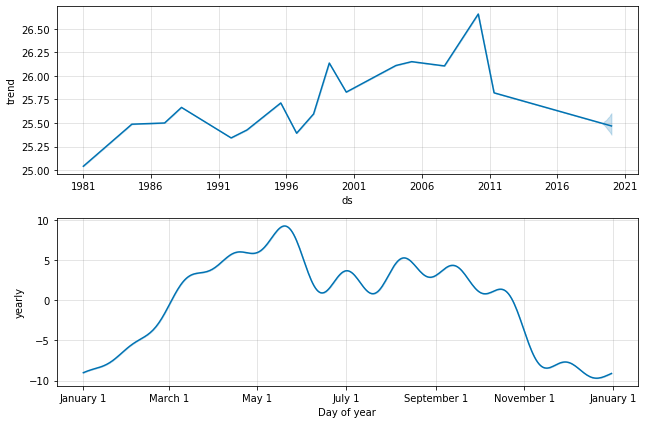

In [72]:
fig2 = model.plot_components(forecast)

In [73]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (444, 1)
13.822457722052174


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,16.10,1,19.431428
1,15.75,1,19.431428
2,16.65,1,19.431428
3,16.85,1,19.431428
4,17.10,1,19.431428
...,...,...,...
439,16.75,12,16.322548
440,16.65,12,16.322548
441,15.25,12,16.322548
442,14.85,12,16.322548


In [74]:
import matplotlib.pyplot as plt

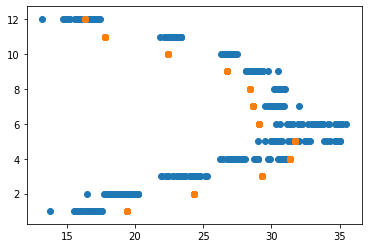

In [75]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()